<a href="https://colab.research.google.com/github/Parul1015/python-mini-projects/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic - Machine Learning from Disaster


Getting start

create a kaggle folder into local drive

copy kaggle.json file into created kaggle folder


In [1]:
! mkdir -p /root/.kaggle
! cp kaggle.json /root/.kaggle


downloading **dataset**

In [2]:
! kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading dataset

In [4]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

working on training dataset

Exploratory data analysis

In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset has the following features:

PassengerId: Unique Id of a passenger

survival: Whether a passenger survived or not; 1 if survived and 0 if not.

pclass: Ticket class

sex: Sex

Age: Age in years

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation

info() method to see more information of our train dataset.

In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describing training dataset

describe() method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Preprocessing
Missing values:

In [10]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
corrMatrix=train_data.corr()

In [13]:
corrMatrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


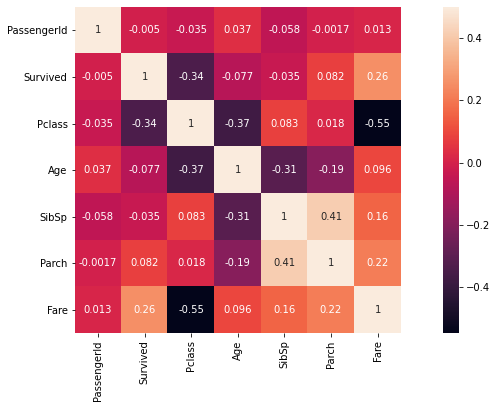

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(corrMatrix,vmax=0.5,square=True,annot=True)

In [15]:
train_data.shape

(891, 12)

working on testing dataset

In [16]:
test_data.shape

(418, 11)

In [17]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [19]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
test_data.value_counts()

PassengerId  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare      Cabin            Embarked
1306         1       Oliva y Ocana, Dona. Fermina                         female  39.0  0      0      PC 17758  108.9000  C105             C           1
1034         1       Ryerson, Mr. Arthur Larned                           male    61.0  1      3      PC 17608  262.3750  B57 B59 B63 B66  C           1
992          1       Stengel, Mrs. Charles Emil Henry (Annie May Morris)  female  43.0  1      0      11778     55.4417   C116             C           1
1001         2       Swane, Mr. George                                    male    18.5  0      0      248734    13.0000   F                S           1
1004         1       Evans, Miss. Edith Corse                             female  36.0  0      0      PC 17531  31.6792   A29              C           1
                                                                                       

In [21]:
test_data.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [22]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
train_data.shape,test_data.shape

((891, 12), (418, 11))

Data Visualization

Single Variable


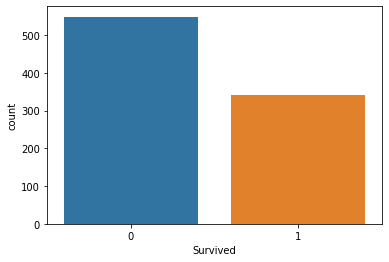

In [24]:
  sns.countplot(x='Survived',data=train_data)
  plt.show()

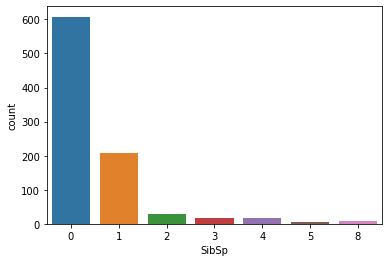

In [25]:
sns.countplot(x='SibSp',data=train_data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


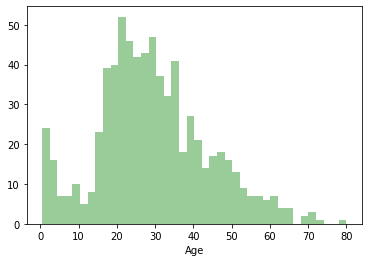

In [26]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='green',bins=40)

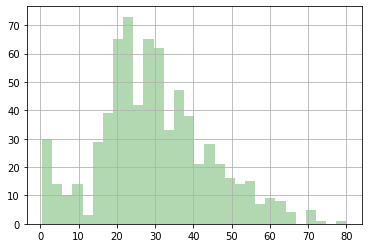

In [27]:
train_data['Age'].hist(bins=30,color='green',alpha=0.3)

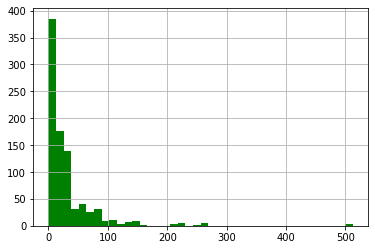

In [28]:
train_data['Fare'].hist(color='green',bins=40)

Bivariate

In [29]:
a= ['Pclass',  'Sex']

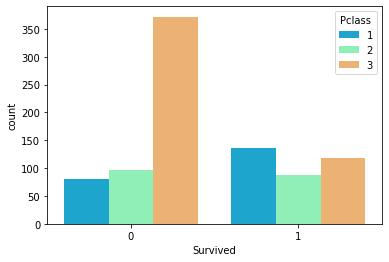

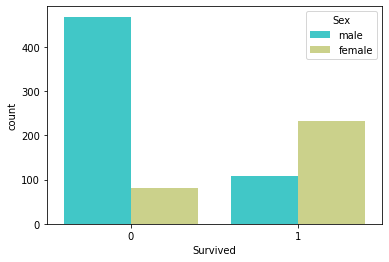

In [30]:
for i in a:
  sns.countplot(x='Survived',hue=i,data=train_data,palette='rainbow')
  plt.show()

Data Cleaning


Now We fill in missing 'age' data instead of dropping the missing age data rows that will lead less accuracy.(loss related data also)

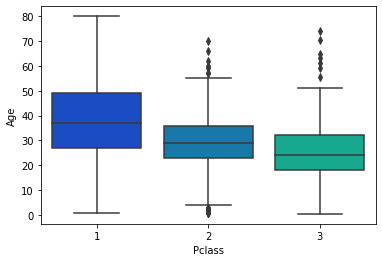

In [31]:
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

In [32]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [33]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

In [34]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

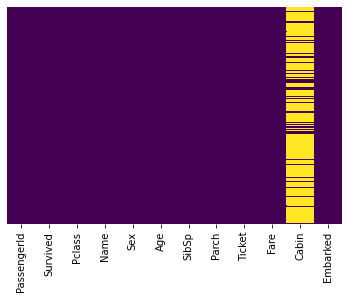

In [35]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
train_data.drop('Cabin',axis=1,inplace=True)

In [37]:
test_data.drop('Cabin',axis=1,inplace=True)

In [38]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
train_data.shape,test_data.shape

((891, 11), (418, 10))

In [40]:
#train_data=train_data.dropna()

In [41]:
#test_data=test_data.dropna()

In [42]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [43]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [52]:
train_data['Age'].fillna(train_data['Age'].mode()[0],inplace=True )
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True )

In [54]:
test_data['Age'].fillna(test_data['Age'].mode()[0],inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mode()[0],inplace=True)

In [55]:
train_data.shape,test_data.shape

((891, 11), (418, 10))

In [56]:
Embarked=pd.get_dummies(train_data['Embarked'],drop_first=True)
Sex = pd.get_dummies(train_data['Sex'],drop_first=True)

In [57]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [59]:
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [60]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [61]:
train_data.shape,test_data.shape

((891, 7), (418, 6))

Feature Extraction

In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

In [62]:
xtrain=train_data.drop('Survived',axis=1)
ytrain=train_data['Survived']
xtest=test_data

In [63]:
xtrain.shape,ytrain.shape,xtest.shape

((891, 6), (891,), (418, 6))

In [64]:
xtrain.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [65]:
xtest.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics  import confusion_matrix,accuracy_score

In [67]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Linear Regression


In [68]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
acc_lin_reg=round(model.score(xtrain,ytrain)*100,2 )
print(str(acc_lin_reg)+'percent')

16.93percent


Logistic Regression

In [69]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
acc_log_reg=round(model.score(xtrain,ytrain)*100,2 )
print(str(acc_log_reg)+'percent')

70.48percent


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


k -Nearest Neighbors

In [70]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
acc_knn = round(model.score(xtrain, ytrain) * 100, 2)
print (acc_knn)

79.91


Decision Tree

In [71]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
acc_decision_tree = round(model.score(xtrain, ytrain) * 100, 2)
print (acc_decision_tree)



100.0


Random Forest





In [72]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
acc_random_forest = round(model.score(xtrain, ytrain) * 100, 2)
print (acc_random_forest)

100.0


Gaussian Naive Bayes

In [73]:
model = GaussianNB()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
acc_gnb = round(model.score(xtrain, ytrain) * 100, 2)
print (acc_gnb)

67.9


Stochastic Gradient Descent (SGD)

In [74]:
model = SGDClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
acc_sgd = round(model.score(xtrain, ytrain) * 100, 2)
print (acc_sgd)

65.66


Comparing Models

In [75]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Logistic Regression', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    
    'Score': [acc_lin_reg,acc_log_reg,acc_knn,  
              acc_decision_tree, acc_random_forest, acc_gnb, 
             acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,100.00
4,Random Forest,100.00
2,KNN,79.91
1,Logistic Regression,70.48
5,Naive Bayes,67.90
6,Stochastic Gradient Decent,65.66
0,Linear Regression,16.93


Evaluation

Random Forest


In [76]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
acc_random_forest = round(model.score(xtrain, ytrain) * 100, 2)
print (acc_random_forest)

100.0


In [77]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": ypred
    })

submission.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!


In [78]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [79]:
submission.value_counts()

PassengerId  Survived
1309         0           1
996          0           1
1024         0           1
1025         0           1
1026         0           1
                        ..
1173         1           1
1174         0           1
1175         0           1
1176         1           1
892          0           1
Length: 418, dtype: int64